In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

In [64]:
df = pd.read_csv('new.csv')
df.dropna()
df

from sklearn.preprocessing import OneHotEncoder

OHenc = OneHotEncoder()
df['Genre'] = OHenc.fit_transform(df[['Genre']]).toarray()
df

from sklearn.preprocessing import OrdinalEncoder
df= df.replace({'Publisher': np.nan}, 'Publisher')
Oenc = OrdinalEncoder()
df[['Name', 'Platform', 'Year', 'Publisher']] = Oenc.fit_transform(df[['Name', 'Platform', 'Year', 'Publisher']])
df




Unnamed: 0   Rank   Name  Platform  Year  Genre  Publisher  NA_Sales   
0             0   9424  511.0      11.0  13.0    0.0      114.0      0.00  \
1             1  15694  326.0      15.0  28.0    0.0       66.0      0.00   
2             2  15166   64.0       9.0  24.0    0.0      121.0      0.00   
3             3  12177  513.0      12.0  23.0    0.0      114.0      0.00   
4             4   9874  105.0       5.0  17.0    0.0       80.0      0.08   
..          ...    ...    ...       ...   ...    ...        ...       ...   
548         548  12799  393.0       3.0  21.0    0.0       20.0      0.05   
549         549  14424   65.0       9.0  22.0    0.0       11.0      0.00   
550         550   7549  222.0      14.0  23.0    0.0      104.0      0.19   
551         551   2207  461.0      20.0  25.0    1.0       86.0      0.48   
552         552  15733  420.0       3.0  22.0    0.0       79.0      0.02   

     EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0        0.00      0.13         0.00          0.13  
1        0.00      0.02         0.00          0.02  
2        0.02      0.00         0.00          0.02  
3        0.00      0.07         0.00          0.07  
4        0.03      0.00         0.00          0.12  
..        ...       ...          ...           ...  
548      0.00      0.00         0.00          0.06  
549      0.02      0.00         0.01          0.03  
550      0.00      0.00         0.02          0.20  
551      0.36      0.02         0.08          0.94  
552      0.00      0.00         0.00          0.02  

[553 rows x 12 columns]

In [65]:
from sklearn.model_selection import train_test_split

Y = df['Platform']
X = df.drop(columns='Platform')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.2, 
                                                    random_state=42)
                                                    

In [66]:
x_train = X_train.dropna()
y_train = Y_train[x_train.index]
x_test = X_test.dropna()
y_test = Y_test[x_test.index]

[Text(0.5220588235294118, 0.9166666666666666, 'x[3] <= 17.5\ngini = 0.925\nsamples = 442\nvalue = [2, 12, 2, 55, 1, 22, 19, 6, 1, 24, 26, 53, 49\n10, 33, 14, 4, 12, 36, 7, 24, 24, 6]'),
 Text(0.23039215686274508, 0.75, 'x[3] <= 12.5\ngini = 0.868\nsamples = 163\nvalue = [2, 0, 2, 1, 1, 21, 18, 6, 1, 6, 26, 35, 0, 0\n3, 0, 4, 12, 0, 0, 1, 24, 0]'),
 Text(0.08823529411764706, 0.5833333333333334, 'x[3] <= 6.5\ngini = 0.765\nsamples = 51\nvalue = [2, 0, 2, 0, 1, 0, 0, 6, 1, 2, 20, 1, 0, 0\n0, 0, 4, 12, 0, 0, 0, 0, 0]'),
 Text(0.0392156862745098, 0.4166666666666667, 'x[5] <= 69.0\ngini = 0.514\nsamples = 12\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 1, 8, 0, 0, 0, 0, 0]'),
 Text(0.0196078431372549, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 5, 0, 0, 0, 0, 0]'),
 Text(0.058823529411764705, 0.25, 'gini = 0.694\nsamples = 7\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 1, 3, 0, 0, 0, 0, 0]'),
 Text(0.13725490196078433,

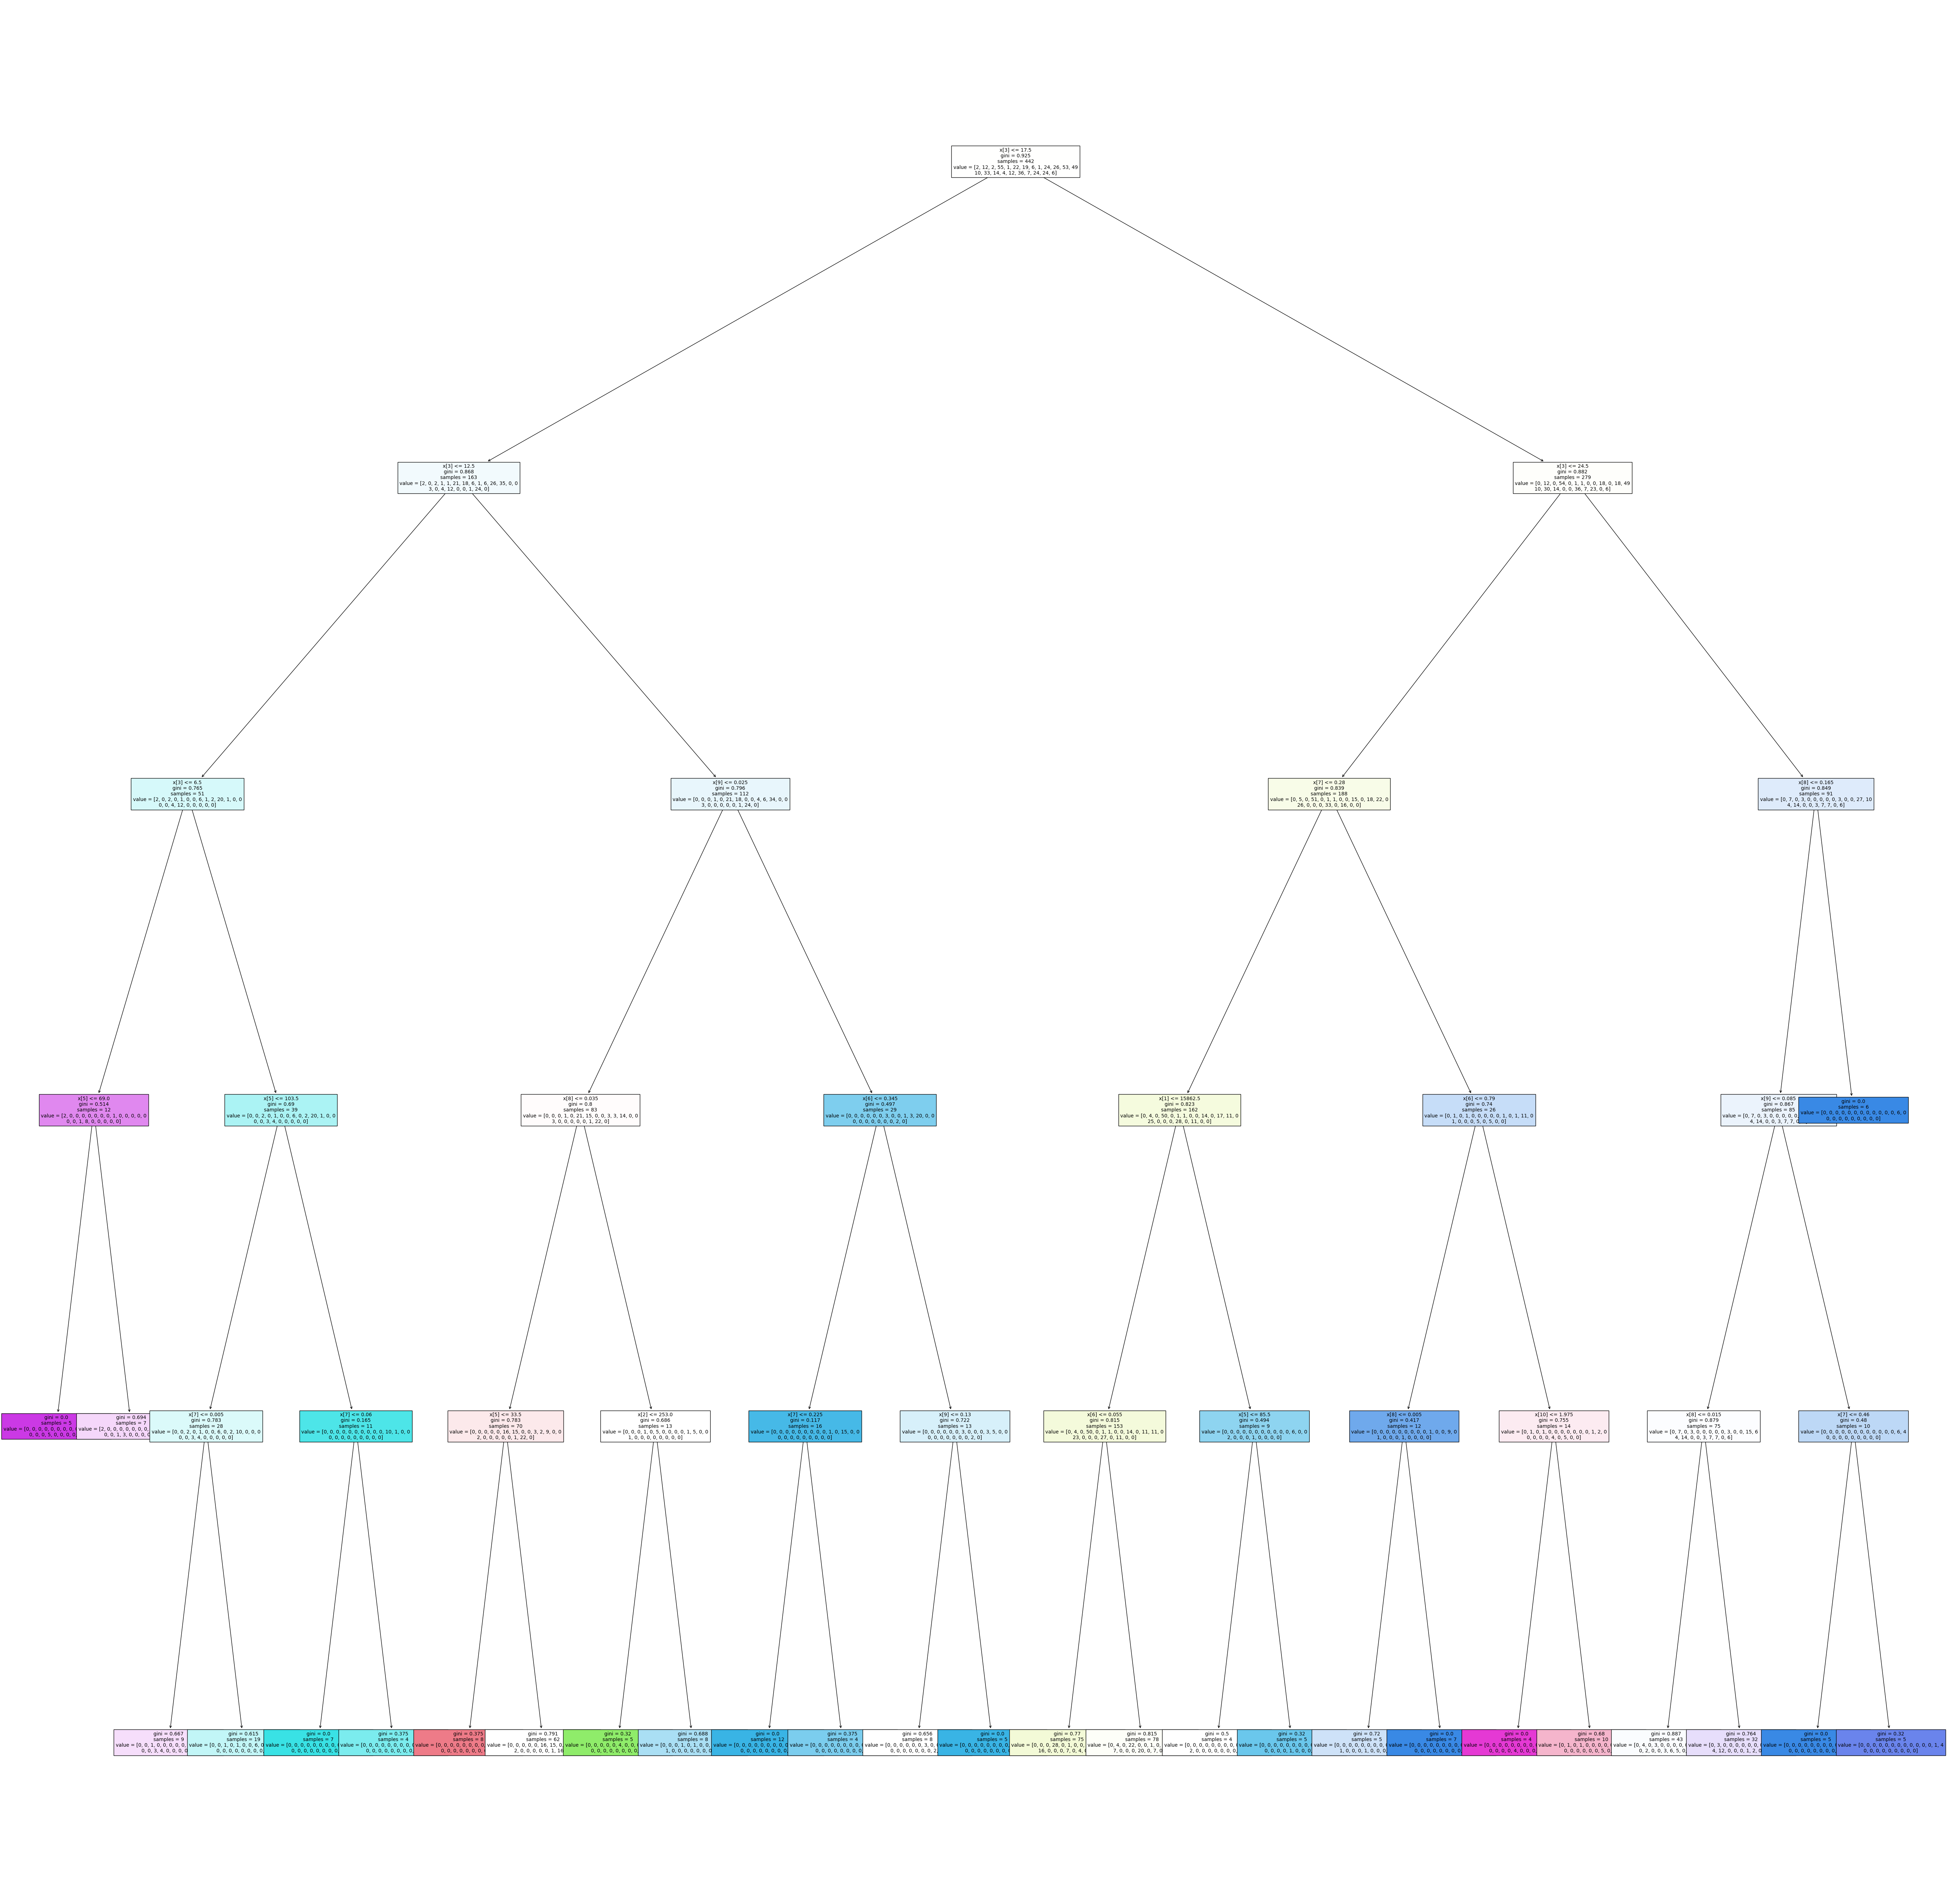

In [67]:
#with
dtc = DecisionTreeClassifier(max_depth=5,
                                  min_samples_leaf=4,
                                  max_leaf_nodes=200)
dtc = dtc.fit(X_train.iloc[::1], Y_train.iloc[::1])
plt.figure(figsize=(70,70))
tree.plot_tree(dtc, filled=True, fontsize=10)

[Text(0.49425163017227497, 0.9736842105263158, 'x[3] <= 17.5\ngini = 0.925\nsamples = 442\nvalue = [2, 12, 2, 55, 1, 22, 19, 6, 1, 24, 26, 53, 49\n10, 33, 14, 4, 12, 36, 7, 24, 24, 6]'),
 Text(0.18292142972146191, 0.9210526315789473, 'x[3] <= 12.5\ngini = 0.868\nsamples = 163\nvalue = [2, 0, 2, 1, 1, 21, 18, 6, 1, 6, 26, 35, 0, 0\n3, 0, 4, 12, 0, 0, 1, 24, 0]'),
 Text(0.051199484785058764, 0.868421052631579, 'x[3] <= 6.5\ngini = 0.765\nsamples = 51\nvalue = [2, 0, 2, 0, 1, 0, 0, 6, 1, 2, 20, 1, 0, 0\n0, 0, 4, 12, 0, 0, 0, 0, 0]'),
 Text(0.010304298824665915, 0.8157894736842105, 'x[3] <= 1.5\ngini = 0.514\nsamples = 12\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 1, 8, 0, 0, 0, 0, 0]'),
 Text(0.005152149412332958, 0.7631578947368421, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.015456448236998873, 0.7631578947368421, 'x[5] <= 94.0\ngini = 0.34\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

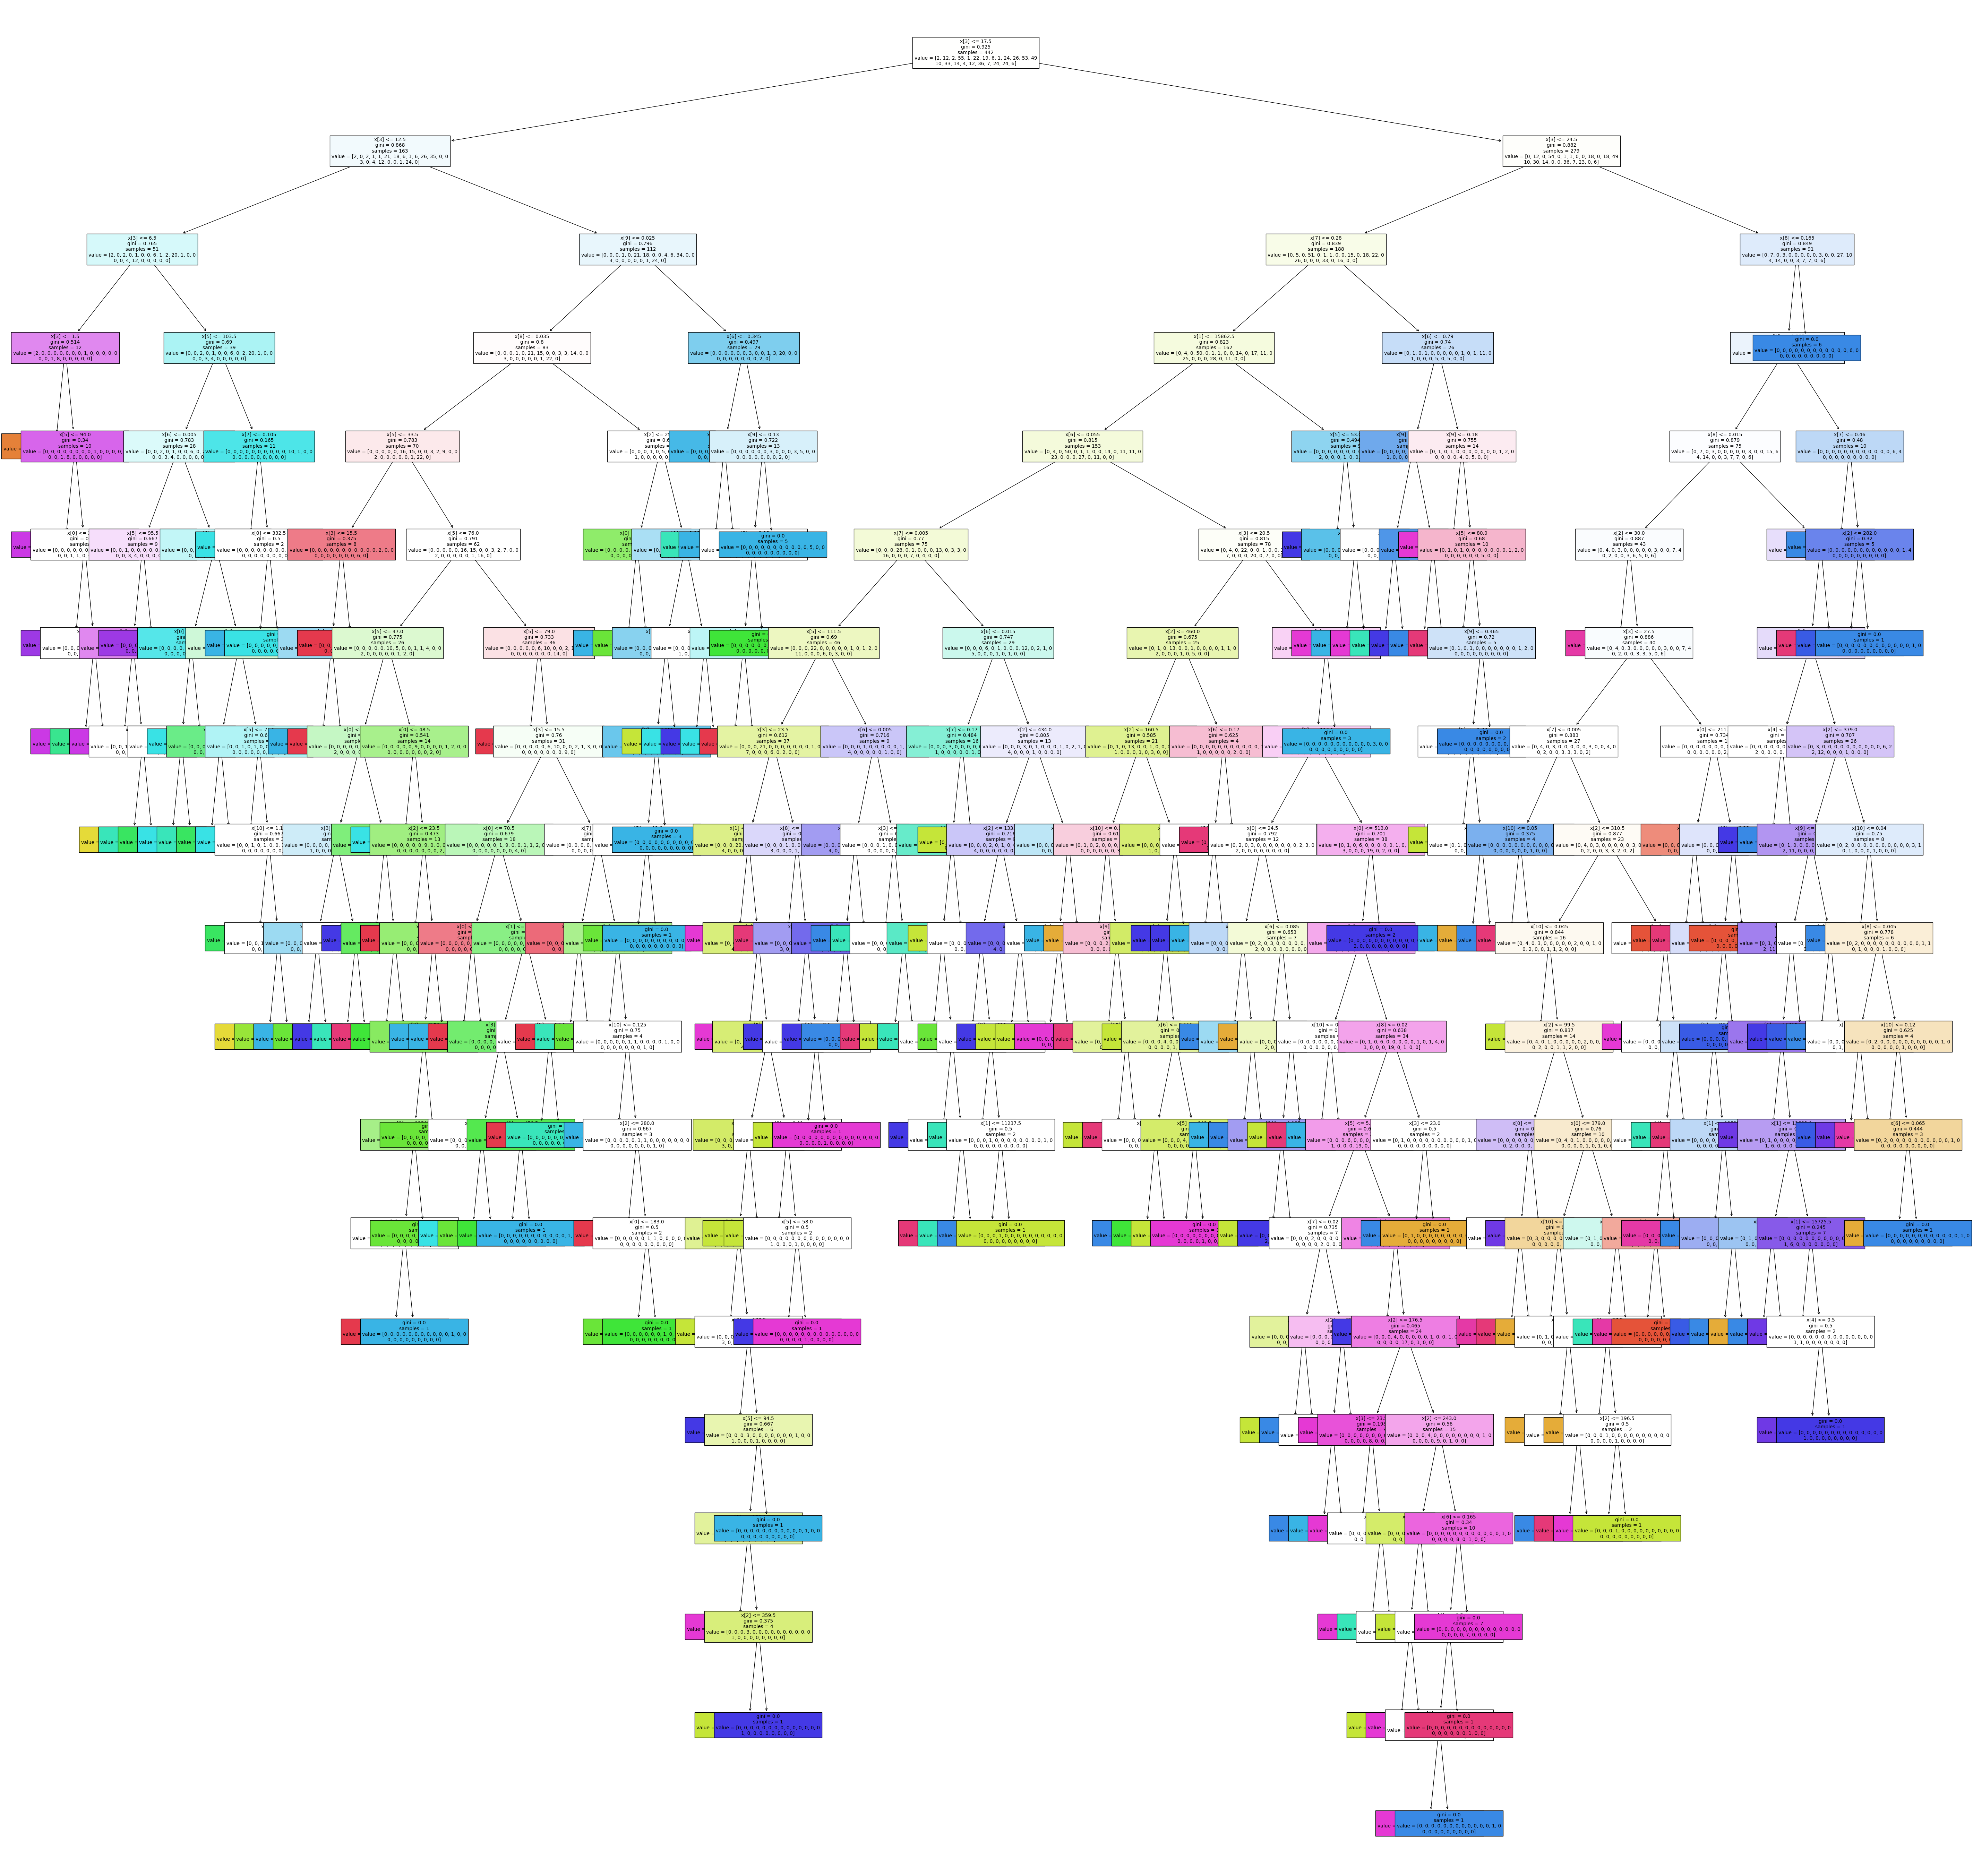

In [68]:
#without
dtc_without = DecisionTreeClassifier()
dtc_without = dtc_without.fit(X_train.iloc[::1], Y_train.iloc[::1])
plt.figure(figsize=(70,70))
tree.plot_tree(dtc_without, filled=True, fontsize=10)

In [69]:
from sklearn import metrics

Y_predicts = dtc.predict(X_test)
Y_predicts_W = dtc_without.predict(X_test)

In [70]:
con_mat = metrics.confusion_matrix(Y_test, Y_predicts)
con_mat

array([[ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 10,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  4],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  5,  0,  2,  3,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0

In [71]:
con_mat_w = metrics.confusion_matrix(Y_test, Y_predicts_W)
con_mat_w

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 5, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0,

Text(50.722222222222214, 0.5, 'Реально')

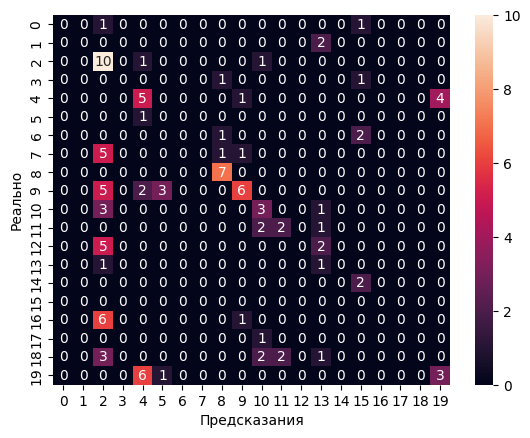

In [72]:
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказания")
plt.ylabel("Реально")

Text(50.722222222222214, 0.5, 'Реально')

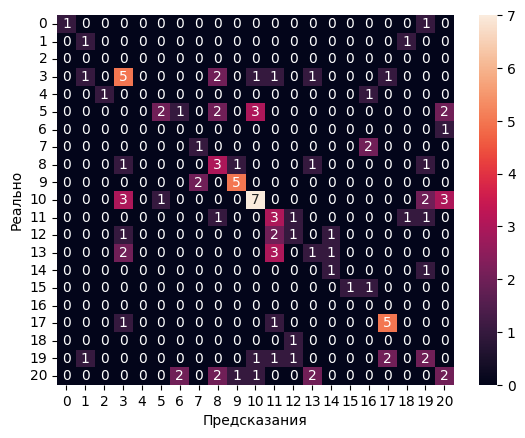

In [73]:
sns.heatmap(con_mat_w, annot=True, fmt="d")
plt.xlabel("Предсказания")
plt.ylabel("Реально")

In [74]:
print("Точность", metrics.accuracy_score(Y_test, Y_predicts))
print("Чувствительность", metrics.recall_score(Y_test, Y_predicts, average='macro'))
print("Аккуратность", metrics.precision_score(Y_test, Y_predicts, average='macro'))
print("Финальная", metrics.f1_score(Y_test, Y_predicts, average='macro'))

Точность 0.3333333333333333
Чувствительность 0.21684523809523806
Аккуратность 0.16716575091575092
Финальная 0.17340359477124184


c:\Users\Alexander\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alexander\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
print("Точность", metrics.accuracy_score(Y_test, Y_predicts_W))
print("Чувствительность", metrics.recall_score(Y_test, Y_predicts_W, average='macro'))
print("Аккуратность", metrics.precision_score(Y_test, Y_predicts_W, average='macro'))
print("Финальная", metrics.f1_score(Y_test, Y_predicts_W, average='macro'))

Точность 0.36936936936936937
Чувствительность 0.3079081632653062
Аккуратность 0.3548455512741227
Финальная 0.3135931236626687


c:\Users\Alexander\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alexander\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
